# Projeto - Análise de Notas de Filmes MovieLens

## Objetivo

Você atua no departamento de análise de dados em um Estúdio de Gravações Cinematográficas. O time de gestores(as) precisa de algumas informações sobre os votos do público a cerca dos últimos filmes. Existe uma pressão dos acionistas para que os próximos lançamentos tenham notas altas e uma aceitação grande pelo público geral.

Assim, com base nos registros disponibilizados, você terá que responder as seguintes perguntas:

**Perguntas**

   1. Quantos filmes por gênero estamos incluindo nesse levantamento?
   2. Quais são os títulos com maiores notas de avaliação pelo público?
   3. Qual a média de votos por filme?
   4. Filmes possuem nota superior a qual valor? Qual o percentual?
   5. Qual a popularidade dos filmes, considerando como regra o número de votos dividido pelo número de filmes?
   6. Quais os gêneros mais indicados para investir, considerando a audiência? Se olhar as notas, ainda seriam esses os filmes?

**Dados:**

- https://raw.githubusercontent.com/vallinoto/ensino/main/ext-manip-dados/aulas/dados/movies.csv
- https://raw.githubusercontent.com/vallinoto/ensino/main/ext-manip-dados/aulas/dados/ratings.csv

## Análise Exploratória

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
URL_movies = 'https://raw.githubusercontent.com/vallinoto/ensino/main/ext-manip-dados/aulas/dados/movies.csv'
URL_ratings = 'https://raw.githubusercontent.com/vallinoto/ensino/main/ext-manip-dados/aulas/dados/ratings.csv'

In [4]:
movies = pd.read_csv(URL_movies)
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.set_index('movieId', inplace=True)
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings = pd.read_csv(URL_ratings)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies['release'] = movies['title'].str.extract("\((\d{4})\)")

In [8]:
movies.head()

,title,genres,release
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [9]:
movies['title'] = movies['title'].apply(lambda x : x.split(" (")[0])

In [10]:
movies.head()

,title,genres,release
movieId,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji,Adventure|Children|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama|Romance,1995
5,Father of the Bride Part II,Comedy,1995


In [11]:
genres = movies['genres']
genres

movieId
1         Adventure|Animation|Children|Comedy|Fantasy
2                          Adventure|Children|Fantasy
3                                      Comedy|Romance
4                                Comedy|Drama|Romance
5                                              Comedy
                             ...                     
193581                Action|Animation|Comedy|Fantasy
193583                       Animation|Comedy|Fantasy
193585                                          Drama
193587                               Action|Animation
193609                                         Comedy
Name: genres, Length: 9742, dtype: object

In [12]:
genres = movies['genres'].str.get_dummies()
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
movies = movies.join(genres)
movies.head()

,title,genres,release,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji,Adventure|Children|Fantasy,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
movies.drop(columns='genres', axis=1, inplace=True)
movies.head()

,title,release,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji,1995,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,1995,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale,1995,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
movies.drop(columns='(no genres listed)', axis=1, inplace=True)
movies.head()

,title,release,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji,1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Quantos filmes por gênero estamos incluindo nesse levantamento?

In [16]:
qtd_gen_movies = genres.sum().sort_values(ascending=False)

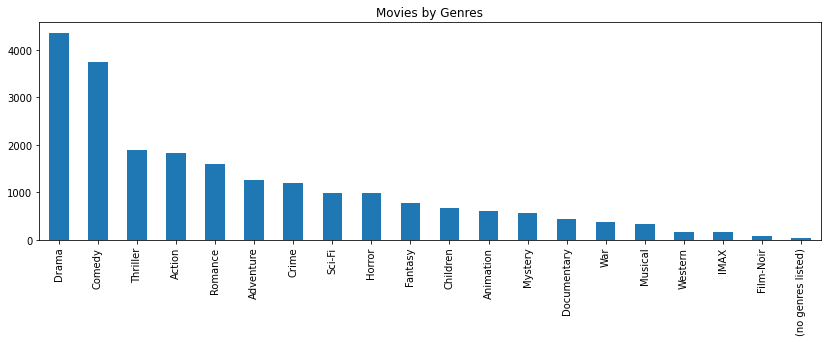

In [17]:
plt.figure(figsize=(14,4))
qtd_gen_movies.plot(kind='bar')
plt.title('Movies by Genres')
plt.show()


### Quais são os títulos com maiores notas de avaliação pelo público?


In [20]:
movies['avg_rtg'] = ratings.groupby('movieId').mean()['rating']
movies

,title,release,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rtg
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.920930
2,Jumanji,1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.431818
3,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,3.259615
4,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,2.357143
5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic,2017,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
193583,No Game No Life: Zero,2017,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.500000
193585,Flint,2017,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.500000


In [21]:
movies['avg_rtg'].sort_values(ascending=False)

movieId
88448     5.0
100556    5.0
143031    5.0
143511    5.0
143559    5.0
         ... 
30892     NaN
32160     NaN
32371     NaN
34482     NaN
85565     NaN
Name: avg_rtg, Length: 9742, dtype: float64

In [22]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [23]:
movies['votes'] = ratings.groupby('movieId').count()['rating']
movies.head()

,title,release,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rtg,votes
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,3.920930,215.0
2,Jumanji,1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3.431818,110.0
3,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,3.259615,52.0
4,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,2.357143,7.0
5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3.071429,49.0


In [24]:
movies['votes'].describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: votes, dtype: float64

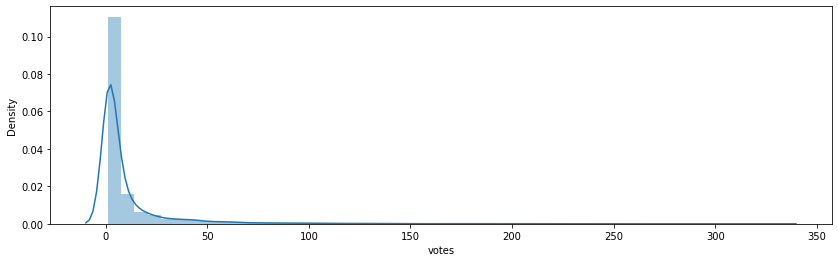

In [26]:
plt.figure(figsize=(14,4))
sns.distplot(movies['votes'])
plt.show()

In [27]:
movies_filtro = movies[ movies['votes'] >= 75 ]

In [36]:
movies_filtro[['title', 'avg_rtg', 'votes']].sort_values(by='avg_rtg', ascending= False).head(10)

,title,avg_rtg,votes
movieId,,,
318,"Shawshank Redemption, The",4.429022,317.0
858,"Godfather, The",4.289062,192.0
2959,Fight Club,4.272936,218.0
750,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041,97.0
904,Rear Window,4.261905,84.0
1221,"Godfather: Part II, The",4.259690,129.0
48516,"Departed, The",4.252336,107.0
1213,Goodfellas,4.250000,126.0
912,Casablanca,4.240000,100.0


### Qual a média de votos por filme?


In [39]:
movies_filtro['votes'].mean()

121.02966101694915

In [40]:
movies_filtro['avg_rtg'].mean()

3.7597293831178678

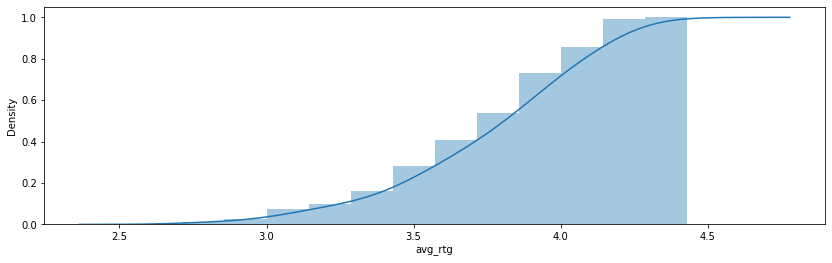

In [46]:
plt.figure(figsize=(14,4))
sns.distplot(movies_filtro['avg_rtg'], hist_kws={ 'cumulative': True} , kde_kws={ 'cumulative': True})
plt.show()

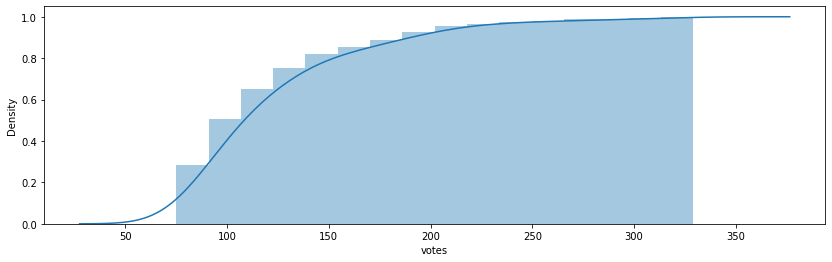

In [48]:
plt.figure(figsize=(14,4))
sns.distplot(movies_filtro['votes'], hist_kws={ 'cumulative': True} , kde_kws={ 'cumulative': True})
plt.show()

In [50]:
print(movies_filtro['avg_rtg'].quantile(0.8))
print(movies_filtro['votes'].quantile(0.8))

4.063291139240507
145.0


### Filmes possuem nota superior a qual valor? Qual o percentual?


In [51]:
perc_avg = round(movies_filtro['avg_rtg'].quantile(0.8),2)
print(f'Considerando pareto, 20% dos filmes possuem media superior a {perc_avg}. ')

Considerando pareto, 20% dos filmes possuem media superior a 4.06 


### Qual a popularidade dos filmes, considerando como regra o número de votos dividido pelo número de filmes?


In [60]:
# qtd de pessoas que votaram
voter_qty = ratings['userId'].nunique()

In [61]:
movies_filtro['popular'] = movies_filtro['votes'] / voter_qty
movies_filtro.head()

,title,release,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rtg,votes,popular
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,3.920930,215.0,0.352459
2,Jumanji,1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3.431818,110.0,0.180328
6,Heat,1995,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,3.946078,102.0,0.167213
10,GoldenEye,1995,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3.496212,132.0,0.216393
16,Casino,1995,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,3.926829,82.0,0.134426


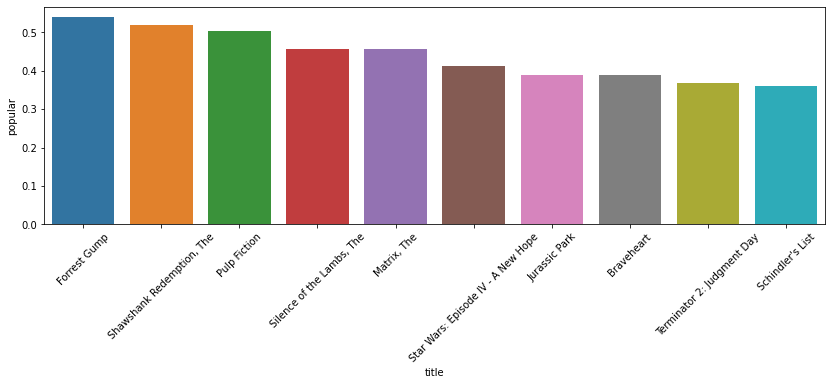

In [67]:
popular_movies = movies_filtro.sort_values(ascending=False, by='popular').head(10)
plt.figure(figsize=(14,4))
plt.xticks(rotation=45)
sns.barplot(data=popular_movies, x='title', y='popular')
plt.show()

### Quais os gêneros mais indicados para investir, considerando a audiência? Se olhar as notas, ainda seriam esses os filmes?

In [69]:
movies_filtro.columns

Index(['title', 'release', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'avg_rtg', 'votes', 'popular'],
      dtype='object')

In [71]:
genres_qty = movies_filtro[['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']].sum()

In [75]:
genres_qty = pd.DataFrame(genres_qty)


In [77]:
genres_qty.reset_index(inplace=True)

In [ ]:
genres_qty.rename(columns={'index': 'genre', 0 : 'qtd'}, inplace=True)


In [82]:
genres_qty['popular'] = genres_qty['qtd'] / genres_qty['qtd'].sum()

In [83]:
genres_qty.head()

,genre,qtd,popular
0,Action,91,0.128531
1,Adventure,82,0.115819
2,Animation,20,0.028249
3,Children,26,0.036723
4,Comedy,84,0.118644


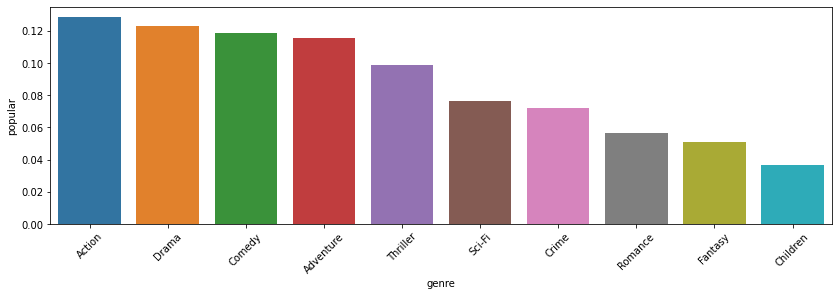

In [84]:
popular_genres = genres_qty.sort_values(ascending=False, by='popular').head(10)
plt.figure(figsize=(14,4))
plt.xticks(rotation=45)
plt.title('Genres by Popularity')
sns.barplot(data=popular_genres, x='genre', y='popular')
plt.show()

In [85]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [86]:
genres = ['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']

In [89]:
dicio = {}
for genre in genres:
  dicio.update(
      {
          genre : movies_filtro[ movies_filtro[genre] == 1 ].mean().avg_rtg
      }
  )

In [98]:
genre_rtg = pd.DataFrame(list(dicio.items())).sort_values(by=1, ascending=False)
genre_rtg.rename(columns= {0 : 'genre', 1:'avg'}, inplace=True)
genre_rtg.head(10)

,genre,avg
17,War,4.068548
9,Film-Noir,3.959499
13,Mystery,3.936145
5,Crime,3.896546
7,Drama,3.894707
10,Horror,3.869872
2,Animation,3.798828
12,Musical,3.767724
11,IMAX,3.751277
16,Thriller,3.745418


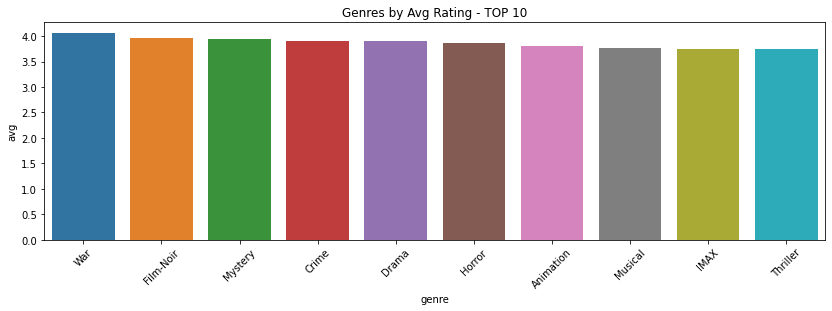

In [100]:
plt.figure(figsize=(14,4))
plt.xticks(rotation=45)
plt.title('Genres by Avg Rating - TOP 10')
sns.barplot(data=genre_rtg.head(10), x='genre', y='avg')
plt.show()

In [108]:
pop = popular_genres.head(10)
avg = genre_rtg.head(10)


In [110]:
for i, row in pop.iterrows():
  if row['genre'] in list(avg['genre']):
    print(row['genre'])
  else:
    continue

Drama
Thriller
Crime


## Conclusões

Dado os achados durante a análise, se utilizarmos o critério de seleção como sendo a média de avaliação os generos WAR, FILM-NOIR, MYSTERY seriam os mais recomendados. Porém, se considerarmos popularidade, teríamos os generos ACTION, DRAMA e COMEDY.

Considerando os top 10 de ambos os critérios, popularidade e avaliação, nossa recomendação seria investir em uma das 3 categorias seguintes: DRAMA, THRILLER e CRIME, por estarem contidas em ambos os critérios.